# Benford's Law

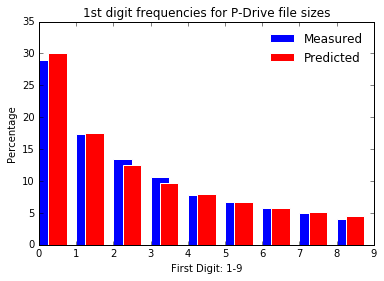


Predicted 1st Digit Ratios:	 [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.5]
Observed 1st Digit Ratios:	 [29.0, 17.4, 13.5, 10.7, 7.8, 6.7, 5.8, 5.0, 4.1] 



In [16]:
"""
Exploring Benford's Law by applying it the files sizes on a local hard drive

Note this is a hacky version that works but is very Pythonic
""" 


import os

### The significand ranges from 1 thru 9 inclusive (0 is excluded)

FIRST_DIGIT_PERCENTAGES = [
                            30.1,    ## '1'
                            17.6,
                            12.5,
                             9.7,
                             7.9,
                             6.7,
                             5.8,
                             5.1,
                             4.5     ## '9'
                          ]

### 2nd and subsequent digits range from 0 thru 9 inclusive (0 is included)

SECOND_DIGIT_PERCENTAGES = [
                             12.0,  ## '0'
                             11.4,
                             10.9,
                             10.4,
                             10.0,
                              9.7,
                              9.3,
                              9.0,
                              8.8,
                              8.5   ## '9'
                            ]


class BenfordDigit(object):
    '''
    Class for investigating whether given number digits adhere to Benford's Law
    Class Attributes:
        __experiment_name:          <string> unique label for each Benford experiment
        __digit_position:           <int>    significand = 1, 2nd digit, counting from LHS = 2 ...
        __digit_count:              <dict>   tally of numbers encountered in given digit position
        __current_number:           <int>    most recent number reported in digit position, used to
                                             increment the corrsponding entry in digit_count tally
        __number_count:             <int>    sum of all numbers found in a given digit_position
        __digit_percent:            <list>   list of percentages corresponding to relative freqs 
                                             for each number for a given digit_position 
                                             (1-9 for significand, or 0-9 otherwise)
    '''
    
    def __init__(self, experiment_name, digit_position):
        self.__experiment_name = experiment_name
        self.__digit_position = digit_position
        
        self.__digit_count = {
                    '0': 0,
                    '1': 0,
                    '2': 0,
                    '3': 0,
                    '4': 0,
                    '5': 0,
                    '6': 0,
                    '7': 0,
                    '8': 0,
                    '9': 0
                   }
        self.__current_number = '1'
        self.__number_count = 0
        
        self.__digit_percent = []
        
    def __str__(self):
        return ('Experiment: %s   Digit position: %i' % (self.__experiment_name,
                                                         self.__digit_position))
    
    def __repr__(self):
        return str(self)
    
    @property
    def experiment_name(self):
        return (self.__experiment_name)
    
    @property
    def digit_position(self):
        return (self.__digit_position)
    
    @property
    def digit_count(self):
        # return [(k,v) for k,v in sorted([(k,v) for k,v in self.__digit_count.items()])]
        return sorted([(k,v) for k,v in self.__digit_count.items()])
        
    
    @property
    def current_number(self):
        return self.__current_number
    
    @current_number.setter
    def current_number(self, number):
        self.__current_number = number
        self.__digit_count[self.__current_number] += 1       
        
        
    @property
    def number_count (self):
        if self.__digit_position == 1:
            # return all numbers excl. 0's
            return sum(value for key, value in self.__digit_count.items() if key != '0')
        else: 
            return sum(value for key, value in self.__digit_count.items()) ## Simplify!
    @property
    def digit_percent (self):
        self.__digit_percent = []  
        if self.__digit_position == 1:
            # return ratio of all numbers excl. 0's
            for i in range(1,10):
                d1_percent = round((100.0*self.__digit_count[str(i)]/self.number_count), 1)            
                self.__digit_percent.append(d1_percent)
            return self.__digit_percent
        else:
            # return ratio of all numbers incl. 0's
            for i in range(0,10):
                d2_percent = round((100.0*self.__digit_count[str(i)]/self.number_count), 1)
                self.__digit_percent.append(d2_percent)
            return self.__digit_percent
        
###--------------------------------------------------------------------------------------------
        
### Significand
benford1 = BenfordDigit('Local P: Drive Files - Significand', 1)

### 2nd Digit
benford2 = BenfordDigit('Local P: Drive Files - 2nd Digit', 2)

for root, dirs, files in os.walk('P:/'):
    for name in files:
        filename = os.path.join(root, name)
        filesize = os.path.getsize(filename)
        
        digit1Strng = (str(filesize))[0]
        benford1.current_number = digit1Strng
        
        if filesize > 9:
            benford2.current_number = str(filesize)[1]


# Plot predicted 1st digits frequencies versus actual

# Show plots in notebook (rather than in separate window)
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

X = np.arange(len(benford1.digit_percent))
plt.bar(X + 0.0, benford1.digit_percent, facecolor='blue', edgecolor='white',
        width=0.5, label="Measured")
plt.bar(X + 0.25, FIRST_DIGIT_PERCENTAGES, facecolor='red', edgecolor='white',
        width=0.5, label="Predicted")

plt.title('1st digit frequencies for P-Drive file sizes')
plt.xlabel('First Digit: 1-9')
plt.ylabel('Percentage')
plt.legend(loc='upper right', frameon=False)

plt.show()

print ('\nPredicted 1st Digit Ratios:\t', FIRST_DIGIT_PERCENTAGES)        
print ('Observed 1st Digit Ratios:\t', benford1.digit_percent, '\n')

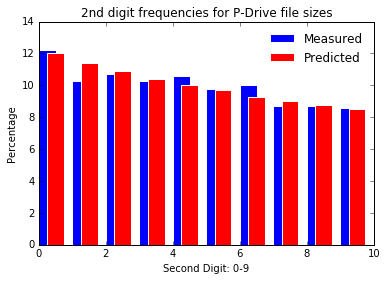


Predicted 2nd Digit Ratios:	 [12.0, 11.4, 10.9, 10.4, 10.0, 9.7, 9.3, 9.0, 8.8, 8.5]
Observed 2nd Digit Ratios:	 [12.2, 10.3, 10.7, 10.3, 10.6, 9.8, 10.0, 8.7, 8.7, 8.6]


In [18]:
# 2nd digit frequencies

X = np.arange(len(benford2.digit_percent))
plt.bar(X + 0.0, benford2.digit_percent, facecolor='blue', edgecolor='white',
        width=0.5, label="Measured")
plt.bar(X + 0.25, SECOND_DIGIT_PERCENTAGES, facecolor='red', edgecolor='white',
        width=0.5, label="Predicted")

plt.title('2nd digit frequencies for P-Drive file sizes')
plt.xlabel('Second Digit: 0-9')
plt.ylabel('Percentage')
plt.legend(loc='upper right', frameon=False)

plt.show()

print ('\nPredicted 2nd Digit Ratios:\t', SECOND_DIGIT_PERCENTAGES) 
print ('Observed 2nd Digit Ratios:\t', benford2.digit_percent)